http://www.nltk.org/book/ch03.html

### Goals:

1. How can we write programs to access text from local files and from the web, in order to get hold of an unlimited range of language material?
2. How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier chapters?
3. How can we write programs to produce formatted output and save it in a file?

### Accessing Text from the Web and from Disk

You can browse the catalog of 25,000 free online books at http://www.gutenberg.org/catalog/, and obtain a URL to an ASCII text file.

Text number 2554 is an English translation of Crime and Punishment, and we can access it as follows.

In [113]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

In [114]:
url = "http://www.gutenberg.org/files/2554/2554.txt"
response = urllib2.urlopen(url)
raw = response.read().decode('utf8')
type(raw)
len(raw)

1176896

In [115]:
tokens = word_tokenize(raw)
tokens[:10]

[u'The',
 u'Project',
 u'Gutenberg',
 u'EBook',
 u'of',
 u'Crime',
 u'and',
 u'Punishment',
 u',',
 u'by']

#### Calculate most common words, but mostly of these are punctuations like ",", ".", "the", ...

In [116]:
freq_dist = nltk.FreqDist(tokens)
freq_dist.most_common(20)

[(u',', 16177),
 (u'.', 10536),
 (u'the', 7431),
 (u'and', 6279),
 (u'to', 5276),
 (u'a', 4464),
 (u'I', 4334),
 (u"''", 4192),
 (u'of', 3846),
 (u'``', 3739),
 (u'he', 3520),
 (u'you', 3485),
 (u'in', 3097),
 (u'that', 3049),
 (u'it', 2928),
 (u'was', 2831),
 (u'!', 2364),
 (u'?', 2275),
 (u'his', 1999),
 (u'at', 1945)]

#### Now let's get rid of the punctuations

In [117]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [118]:
new_tokens = tokenizer.tokenize(raw)
freq_dist = nltk.FreqDist(new_tokens)
freq_dist.most_common(20)

[(u'the', 7437),
 (u'and', 6290),
 (u'to', 5413),
 (u'a', 4472),
 (u'I', 4401),
 (u'of', 3848),
 (u'he', 3633),
 (u'you', 3506),
 (u'in', 3099),
 (u'that', 3068),
 (u'it', 2945),
 (u'was', 2803),
 (u'his', 1999),
 (u'at', 1945),
 (u'her', 1772),
 (u's', 1756),
 (u'not', 1725),
 (u'with', 1723),
 (u'for', 1598),
 (u'him', 1579)]

#### Exclude the stop words

In [119]:
from nltk.corpus import stopwords

tokens_no_stop_words = []
for word in new_tokens:
    if word not in stopwords.words('English'):
        tokens_no_stop_words.append(word)
        
freq_dist = nltk.FreqDist(tokens_no_stop_words)
freq_dist.most_common(20)

[(u'I', 4401),
 (u'He', 1259),
 (u'Raskolnikov', 784),
 (u'And', 747),
 (u'But', 683),
 (u'You', 602),
 (u'one', 586),
 (u'The', 554),
 (u'would', 553),
 (u'know', 528),
 (u'said', 518),
 (u'It', 515),
 (u'could', 486),
 (u'What', 477),
 (u'man', 475),
 (u'like', 451),
 (u'She', 442),
 (u'come', 426),
 (u'though', 413),
 (u'Sonia', 402)]

### To plot, you can turn the most_common list to a dataframe

In [120]:
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
df = pd.DataFrame(freq_dist.most_common(20), columns=['word', 'frequency'])
df.head(5)

,word,frequency
0,I,4401
1,He,1259
2,Raskolnikov,784
3,And,747
4,But,683


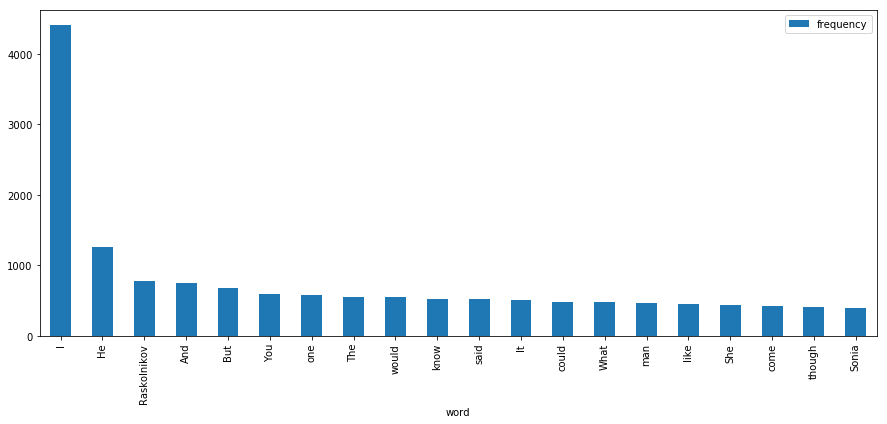

In [123]:
df.plot(x='word', y='frequency', kind='bar', figsize=(15,6))
